# EDA Data Finance Project

### Import Pandas & Load Dataset

In [61]:
import pandas as pd

loan_payments_csv_df = pd.read_csv("loan_payments.csv")   #imports extracted csv file


### Initial exploration of the data contained within the dataframe.

Explore the shape of the dataframe.

In [62]:
shape = loan_payments_csv_df.shape
print(f'This dataset has {shape[0]} rows and {shape[1]} columns')

This dataset has 54231 rows and 43 columns


Identify the datatypes from each column within the dataframe.

In [63]:
print(loan_payments_csv_df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

### Correcting Column Datatypes

Load in the DataTransform Class to modify columns to the correct datatype, and then print modified datatypes and the first 5 rows of the modified dataframe.

In [64]:
from db_utils_local import DataTransform

transformer = DataTransform(loan_payments_csv_df)

transformer.convert_int_column_to_float('loan_amount')
transformer.extract_nums_from_start_string('term')
transformer.convert_column_to_category('application_type')
transformer.convert_column_to_category('grade')
transformer.convert_column_to_category('sub_grade')
transformer.convert_column_to_category('employment_length')
transformer.convert_column_to_category('home_ownership')
transformer.convert_column_to_category('verification_status')
transformer.convert_column_to_datetime('issue_date')
transformer.convert_column_to_category('loan_status')
transformer.convert_column_to_category('payment_plan')
transformer.convert_column_to_category('purpose')
transformer.convert_column_to_datetime('earliest_credit_line')
transformer.convert_column_to_datetime('last_payment_date')
transformer.convert_column_to_datetime('next_payment_date')
transformer.convert_column_to_datetime('last_credit_pull_date')
transformer.convert_column_to_category('application_type')



modified_df = transformer.return_dataframe()

print(modified_df.dtypes)
#print(modified_df.loc[:,['issue_date','loan_amount','term', 'employment_length']].head(20))
print(modified_df.head(20))

id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

Load in the DataFrameInfo Class to extract information from the dataframe and it's columns.

In [65]:
from db_utils_local import DataframeInfo

df_info = DataframeInfo(modified_df)

print(df_info.describe_columns())
print(df_info.extract_statistics())
print(df_info.count_dist_values_cat())
print(df_info.shape_of_df())
print(df_info.count_percent_null())





id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

### Null Values

In the section above the null values are clearly identified within each category. To start with we can visualise the missing data using a missingno matrix, shown below:

<Axes: >

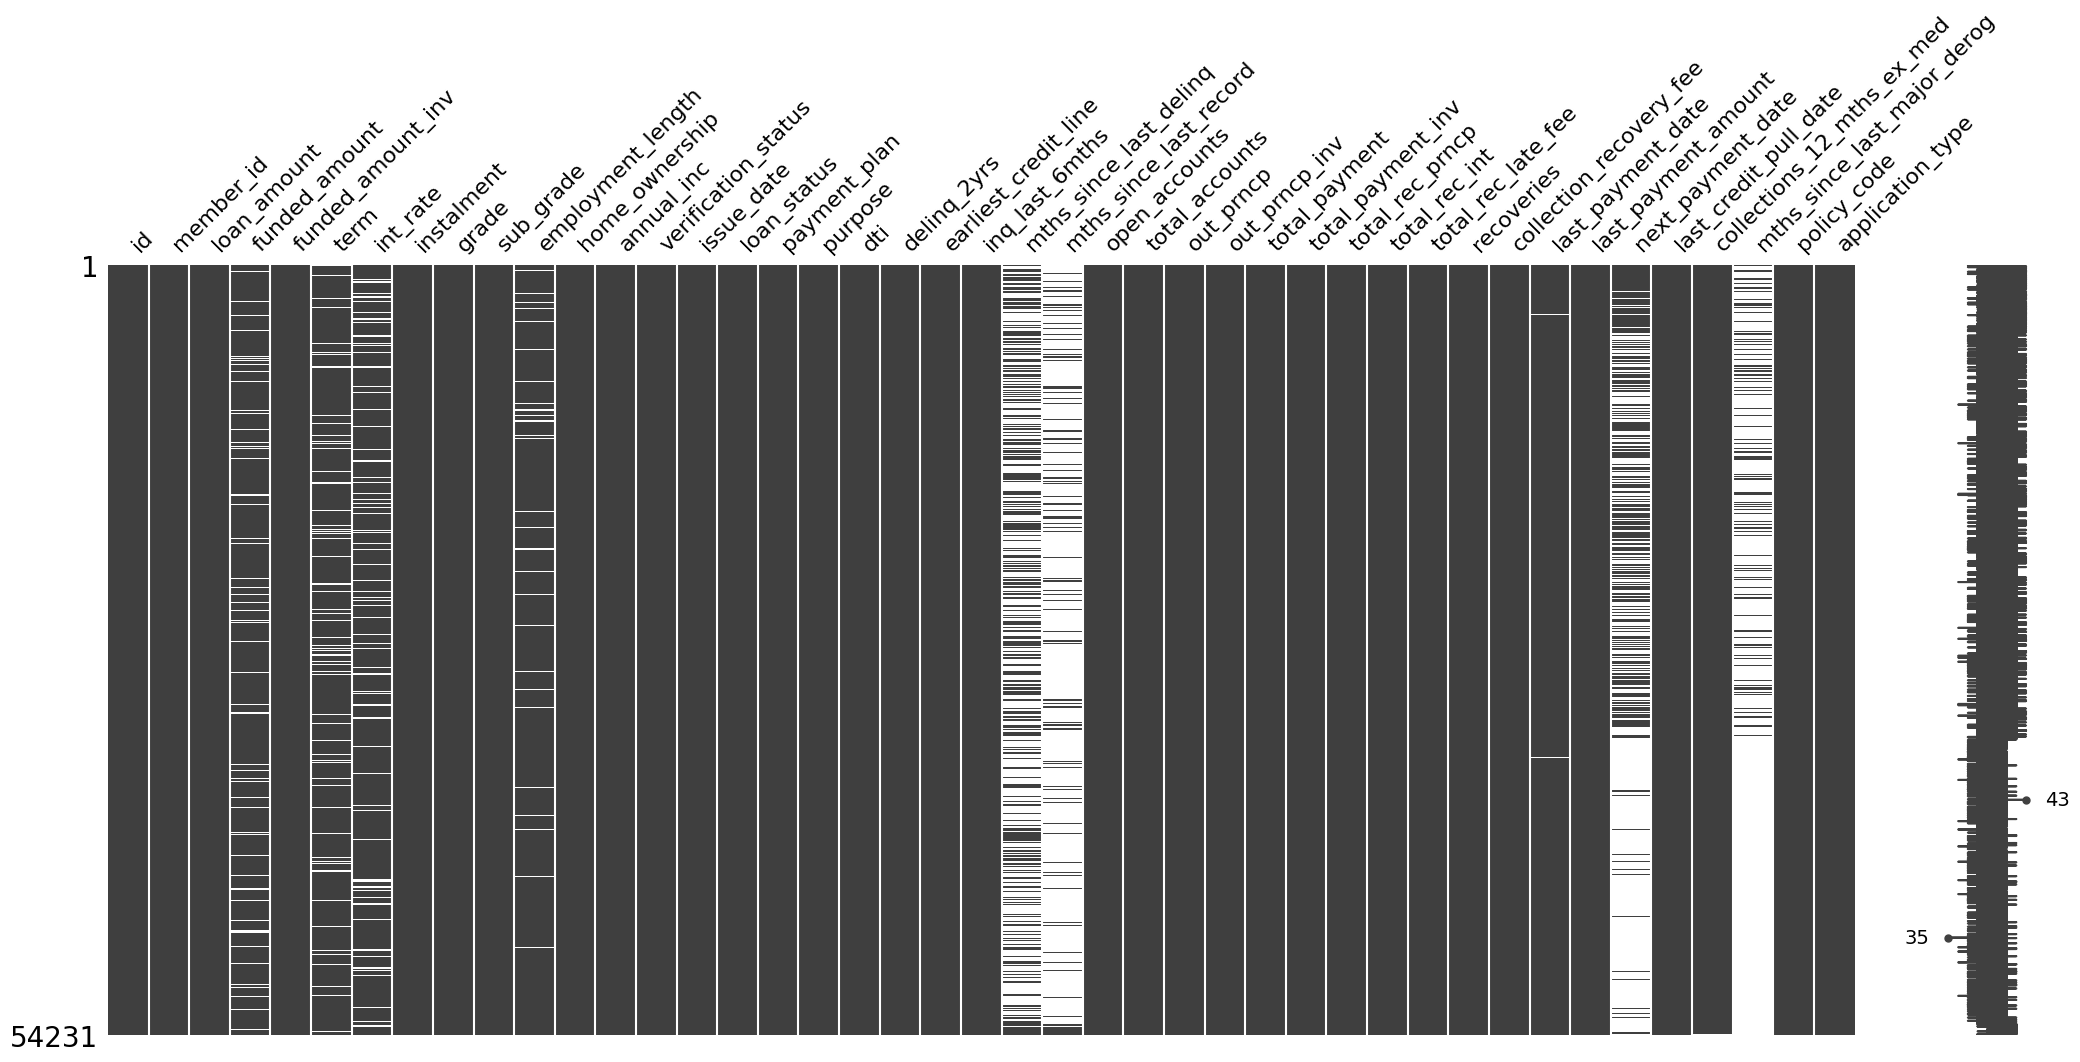

In [66]:
import missingno as msno

msno.matrix(modified_df)




Four categories had such a large % of null values (between 57-87%) that those columns were removed entirely from the dataframe, as shown below.

The funded_amount column was missing 3007 data points, equating to 5.54% of the values. These values are highly correlated to and typically identical values to the funded_amount_inv and loan_amount. Statistical analysis on these columns, shown earlier in this report, evidences this correlation.

Due to this high correlation, this column is essentially duplicate data, with some missing values, and does not provide meaningful additional information to the dataset, so it will be dropped.

In addition to this, one of the other two columns should also be removed when dropping overly correlated columns in task 6.

In [67]:
df_info = DataframeInfo(modified_df)

print(df_info.describe_columns())

from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_column('mths_since_last_delinq')
dftransformer.delete_column('mths_since_last_record')
dftransformer.delete_column('next_payment_date')
dftransformer.delete_column('mths_since_last_major_derog')
dftransformer.delete_column('funded_amount')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())


id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

Two columns contained very few null values, but these records were generally missing a variety of data, so the rows were removed, as shown below.

In [68]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row('last_payment_date')
dftransformer.delete_row('last_credit_pull_date')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())


                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                 2114         3.903898
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

The collections_12_mths_ex_med column is missing a very small amount of data (0.09%) and the vast majority (99.52%) of values within this columnn are zero, making the median and mode zero. The null values in this column were replaced with zero, as it was the median and mode value, and numerically close to the mean (0.0042). 

In [69]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_median('collections_12_mths_ex_med')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())

                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                 2114         3.903898
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

c:\Users\clair\AiCore_Course\EDA Project\db_utils_local.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_impute = self.df[column_name].fillna(self.df[column_name].median(), inplace=True) # Replaces null value with median value


The employment_length column has 2118 null values, representing approxmately 3.9% of the dataset rows. The discrete probability distribution below, demonstrates that 10+ years is by far the most frequent category for employment_length, and assigning the small number of null values to this modal category will not add much to the already highly skewed nature of this category. 

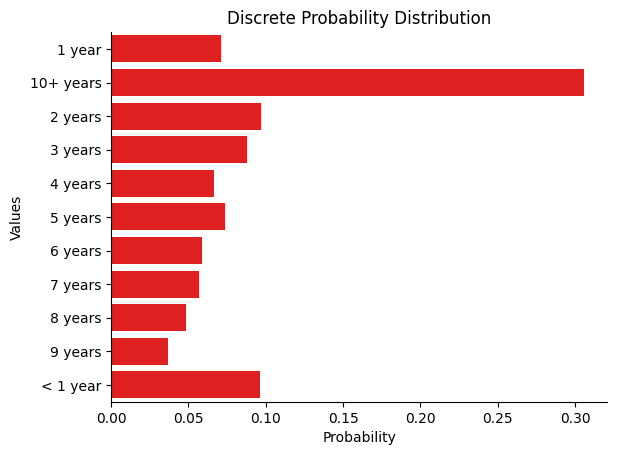

In [70]:
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

dfplotter.discrete_probability_distribution('employment_length')

So the employment_length null values are replaced with the modal category of 10+ years, as shown below.

In [71]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_mode('employment_length')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())

c:\Users\clair\AiCore_Course\EDA Project\db_utils_local.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mode_impute = self.df[column_name].fillna(self.df[column_name].mode()[0], inplace=True) # Replaces null value with mode value


                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

Reproducing the discrete probability distribution after the mode impute, shows a very similar result.

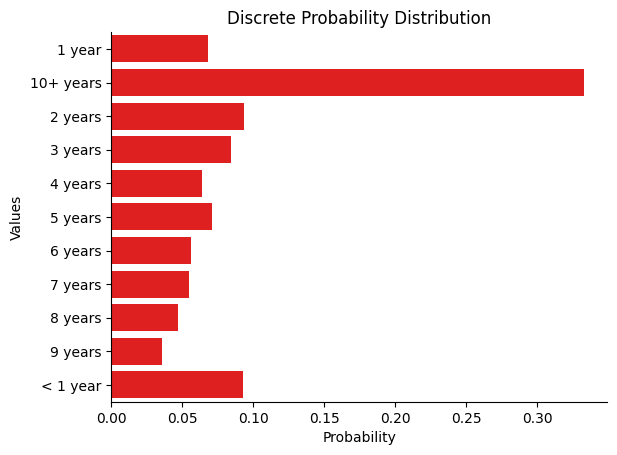

In [72]:
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

dfplotter.discrete_probability_distribution('employment_length')

In [73]:
# Group by 'Category' and calculate mean, median, and std dev
grouped = modified_df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])

# Display the result
print(grouped)

                mean  median       std    max    min
sub_grade                                           
A1          5.916654   6.030  0.335889   7.37   5.42
A2          6.549865   6.620  0.450687   7.68   5.79
A3          7.338374   7.620  0.453513   8.00   6.17
A4          7.785684   7.900  0.545158   9.32   6.54
A5          8.569729   8.900  0.634619   9.63   6.91
B1          9.776817   9.710  0.496137  11.14   6.00
B2         10.690841  10.990  0.493848  11.48   9.01
B3         11.465068  11.710  0.646449  11.99   9.33
B4         12.238768  12.420  0.846440  12.99   9.64
B5         12.637586  12.690  1.027472  13.67   6.00
C1         13.498925  13.680  0.842821  14.30   6.00
C2         14.068955  14.330  0.953648  15.10  10.59
C3         14.719312  15.220  1.022945  15.61   6.00
C4         15.334145  15.880  1.086108  16.20  11.22
C5         16.043528  16.780  1.258998  17.10  11.54
D1         16.647544  17.560  1.389584  17.76   6.00
D2         16.911867  17.570  1.590166  18.55 

C:\Users\clair\AppData\Local\Temp\ipykernel_19796\2532054989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = modified_df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])


The columns int_rate and term are both missing a moderate number of values (9.53% and 8.8% respectively), which is too many values to just delete those rows but not enough rows to warrant removing the column. Also these are both likely to be very useful information when assessing the loan portfolio.

Methods were identified to impute appropriate values into both columns, however errors with this imputation arose when both fields were missing. Due to this problem, rows where both the int_rate and term were missing had to be removed. This was only a small number of rows (467), and meant that data integrity could be preserved for the remaining rows within the dataframe.

In [74]:
# Insert code to remove the row when both int_rate and term are null.
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row_if_both_null('int_rate', 'term')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())

                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4299         8.007973
int_rate                          4694         8.743760
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

When the dataframe is organised by sub_grade, the int_rate groups together in sections where all loans in a particular time period are given a specific rate. The loan raate changes over time for each sub grade of loan, but it is reasonable to impute the interest rate of the loan below when this is missing from the data. The vast majority of these imputations will be correct, as the missing value is between two identical rates. Very occasionally the row above and below the missing value are different, although generally by only a few tenths of a percent, and this will mean that the imputed int_rate could be inaccurate.

In [81]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_previous_row_value('sub_grade','int_rate')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())
# modified_df.to_csv('modified_loan_payments.csv', index=False)

                            Count Null  Percentage Null
id                                   0              0.0
member_id                            0              0.0
loan_amount                          0              0.0
funded_amount_inv                    0              0.0
term                                 0              0.0
int_rate                             0              0.0
instalment                           0              0.0
grade                                0              0.0
sub_grade                            0              0.0
employment_length                    0              0.0
home_ownership                       0              0.0
annual_inc                           0              0.0
verification_status                  0              0.0
issue_date                           0              0.0
loan_status                          0              0.0
payment_plan                         0              0.0
purpose                              0          

The term of the loan can be calculated from the loan amount (loan_amount), interest rate (int_rate) and monthly payments (instalment). Using this formula did cause some problems at first, as there were 6 rows within the dataframe that this method would not work for. Closer inspection of these errors, which were printed out and the skipped over, led to the realisation that they all contain some form of data entry error made during the creation of these entries into the dataframe.

In [76]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_term('term', 'loan_amount', 'int_rate', 'instalment')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
#modified_df.to_csv('modified_loan_payments.csv', index=False)

1049553
math domain error
35000.0
0.1991
573.18
791421
math domain error
30000.0
0.20989999999999998
497.01
754045
math domain error
35000.0
0.20620000000000002
577.74
616162
math domain error
14000.0
0.0654
47.54
339569
math domain error
9850.0
0.1482
79.53
316948
math domain error
16000.0
0.1324
83.68
                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                                 6         0.011177
int_rate                             0         0.000000
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc             

Now we will remove each of those 6 individual rows using the unique id. These are data entry errors in the initial database, and the values cannot be used to calulate the term of the loan as one or more of the other values in the formula is incorrect.

In [77]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row_using_id(1049553)
dftransformer.delete_row_using_id(791421)
dftransformer.delete_row_using_id(754045)
dftransformer.delete_row_using_id(616162)
dftransformer.delete_row_using_id(339569)
dftransformer.delete_row_using_id(316948)

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())






                            Count Null  Percentage Null
id                                   0              0.0
member_id                            0              0.0
loan_amount                          0              0.0
funded_amount_inv                    0              0.0
term                                 0              0.0
int_rate                             0              0.0
instalment                           0              0.0
grade                                0              0.0
sub_grade                            0              0.0
employment_length                    0              0.0
home_ownership                       0              0.0
annual_inc                           0              0.0
verification_status                  0              0.0
issue_date                           0              0.0
loan_status                          0              0.0
payment_plan                         0              0.0
purpose                              0          

Use missingno to visualise the null values. It produces a whitespace type chart. Do this before and after null value removal.

<Axes: >

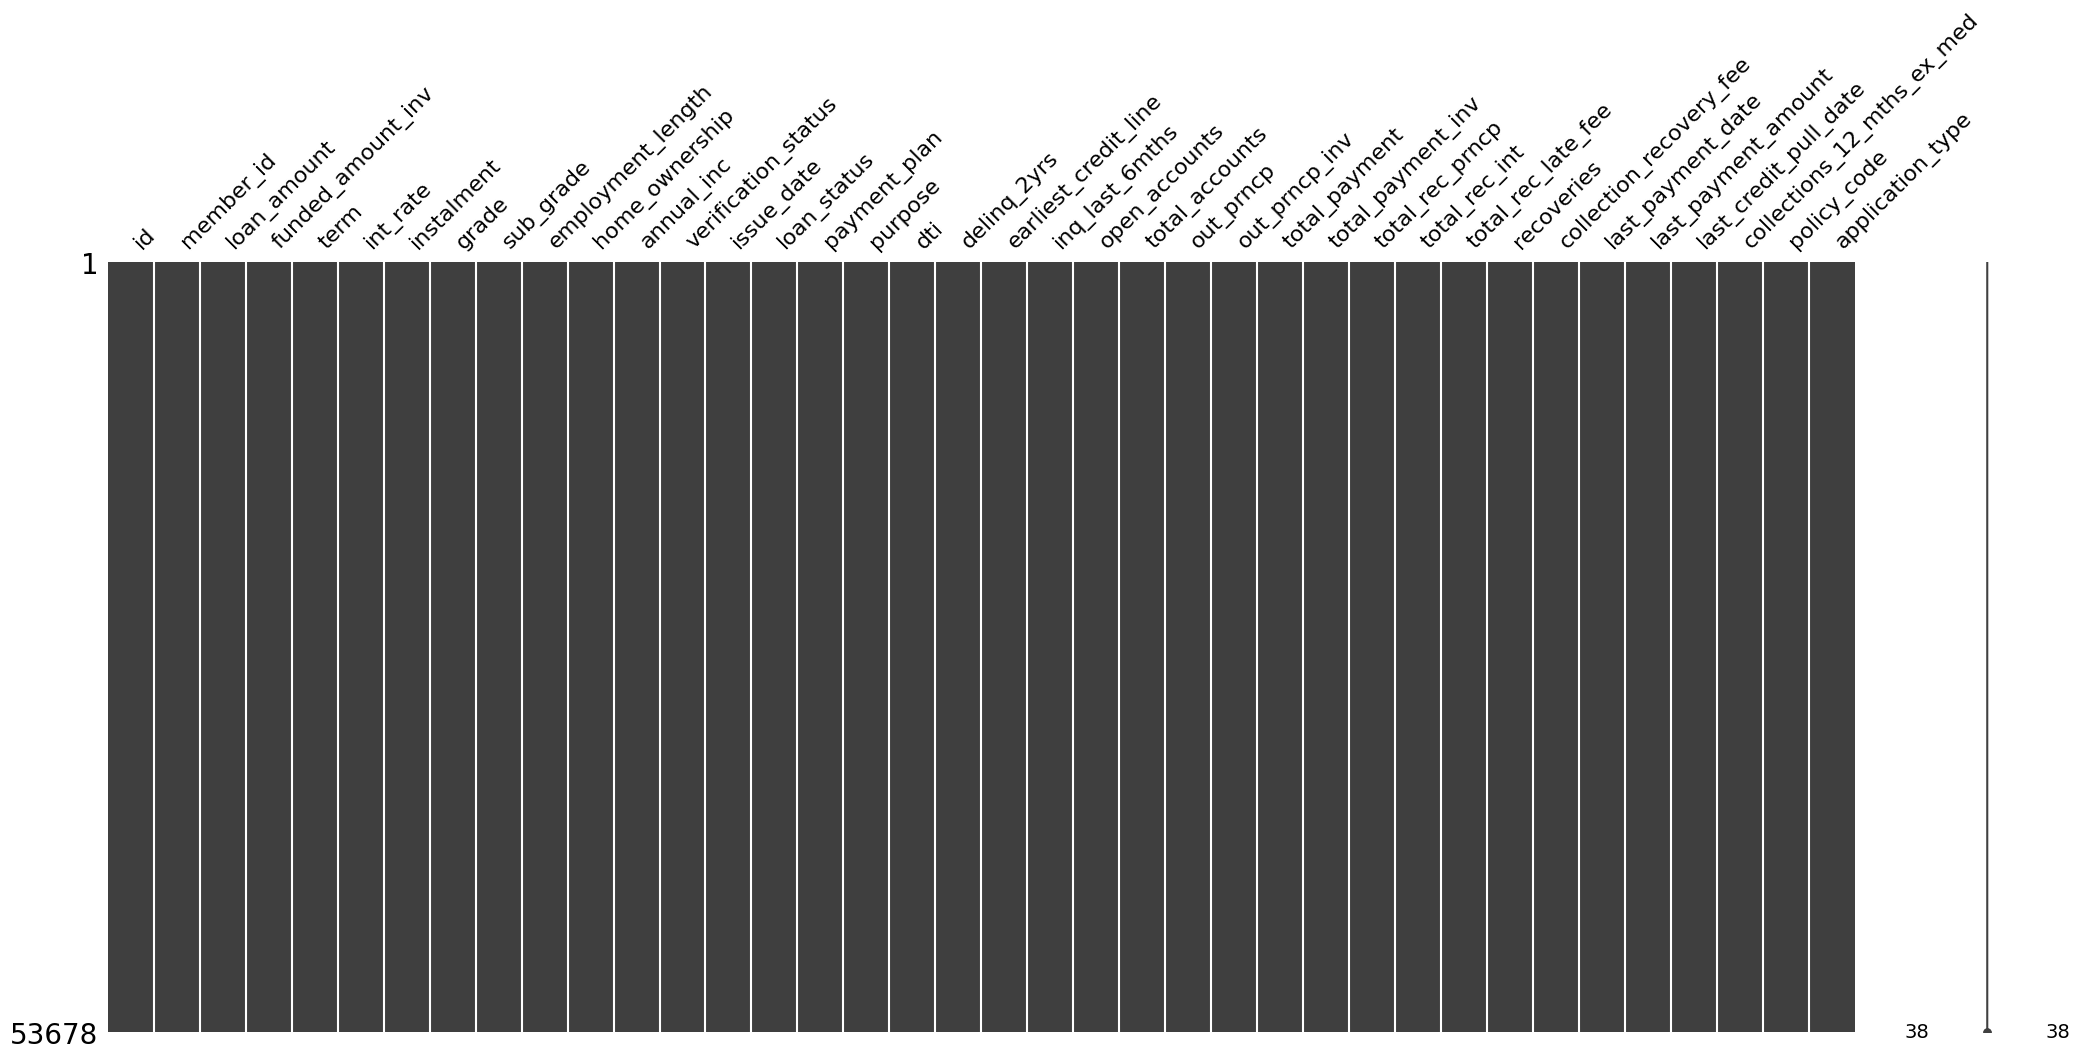

In [78]:
import missingno as msno

msno.matrix(modified_df)

### Skewed Data in Dataset

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis.

However to start, the immuting of the 'term' during null has changed the 'term' column to an 'object' data_type and needs to be changed back to a 'int' type.

In [79]:
transformer = DataTransform(modified_df)

transformer.convert_obj_to_int('term')

df_info = DataframeInfo(modified_df)
print(df_info.describe_columns())



id                                     int64
member_id                              int64
loan_amount                          float64
funded_amount_inv                    float64
term                                   int32
int_rate                             float64
instalment                           float64
grade                                 object
sub_grade                             object
employment_length                     object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_date                    datetime64[ns]
loan_status                           object
payment_plan                          object
purpose                               object
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line          datetime64[ns]
inq_last_6mths                         int64
open_accounts                          int64
total_acco

The skewness of the numeric columns can now be determined as below

In [80]:
numeric_columns = modified_df.select_dtypes(include=['number']).columns
skewness = modified_df[numeric_columns].skew()
print (skewness)


id                             2.369068
member_id                      2.204345
loan_amount                    0.804710
funded_amount_inv              0.813671
term                           1.955747
int_rate                       0.413097
instalment                     0.997088
annual_inc                     8.760052
dti                            0.189554
delinq_2yrs                    5.389099
inq_last_6mths                 3.259813
open_accounts                  1.060080
total_accounts                 0.779404
out_prncp                      2.355164
out_prncp_inv                  2.355587
total_payment                  1.271102
total_payment_inv              1.259468
total_rec_prncp                1.262659
total_rec_int                  2.204944
total_rec_late_fee            13.163901
recoveries                    14.414476
collection_recovery_fee       27.795372
last_payment_amount            2.496532
collections_12_mths_ex_med    20.278761
policy_code                    0.000000
